# Benchmark DRL with Q-Network and Augmented with Manual Insights

```BibTeX
@article{theate2021application,
  title={An application of deep reinforcement learning to algorithmic trading},
  author={Th{\'e}ate, Thibaut and Ernst, Damien},
  journal={Expert Systems with Applications},
  volume={173},
  pages={114632},
  year={2021},
  publisher={Elsevier}
}
```

## Setup Notebook

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import sys
warnings.filterwarnings("ignore")

INSTALL_DEPS = False
if INSTALL_DEPS:
    # If Kaggle or Colab, you have to manage these. If local, install requirements.txt
    %pip install yfinance==0.2.43
    # %pip install scipy==1.14.1
    # %pip install statsmodels==0.14.2
    # %pip install tabulate==0.9.0
    # %pip install torch==2.4.1
    # %pip install tqdm==4.66.5
    # %pip install gym==0.26.1
    # %pip install numpy==2.1.1
    # %pip install pandas==2.2.2

IN_KAGGLE = IN_COLAB = False
try:
    # https://www.tensorflow.org/install/pip#windows-wsl2
    import google.colab
    from google.colab import drive

    drive.mount("/content/drive")
    DATA_PATH = "/drive/input/drl-dataset-quant"
    IN_COLAB = True
    print("Colab!")
except:
    IN_COLAB = False
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ and not IN_COLAB:
    print("Running in Kaggle...")
    for dirname, _, filenames in os.walk("/kaggle/input"):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    DATA_PATH = "/kaggle/input/drl-dataset-quant"
    sys.path.insert(1, "/kaggle/usr/lib/drlutil")
    IN_KAGGLE = True
    print("Kaggle!")
elif not IN_COLAB:
    IN_KAGGLE = False
    DATA_PATH = "./data/"
    print("running localhost!")

running localhost!


In [2]:
from drlutil import TradingSimulator

## Experiment Parameters

In [3]:
simulator = TradingSimulator()
strategy = "TDQN"
stock = "TeslaAug"

augmented_features = ['ES', 'MS', 'IV', 'MF', 'SF', 'MFCST', 'EFCST']
features=['Close', 'Low', 'High', 'Volume'] + augmented_features
money=100000.
stateLength = 30
observationSpace = 1 + ((stateLength- 1)*len(features))
actionSpace = 2
bounds = [1, 30]
step = 1
numberOfEpisodes = 50
startingDate = '2012-1-1'
endingDate = '2020-1-1'
splitingDate = '2018-1-1'
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100


print(observationSpace)

320


# Run Experiments

## Test Selected Stock and Strategy

INFO:root:Training progression (hardware selected => cuda:0):
100%|██████████| 50/50 [20:09<00:00, 24.19s/it]
INFO:root:
╒═══════════════════════════╤═══════════╕
│   Performance Indicator   │   TDQN    │
╞═══════════════════════════╪═══════════╡
│    Profit & Loss (P&L)    │ 102198433 │
├───────────────────────────┼───────────┤
│     Annualized Return     │  43.07%   │
├───────────────────────────┼───────────┤
│   Annualized Volatility   │  45.42%   │
├───────────────────────────┼───────────┤
│       Sharpe Ratio        │   2.776   │
├───────────────────────────┼───────────┤
│       Sortino Ratio       │   4.648   │
├───────────────────────────┼───────────┤
│     Maximum Drawdown      │  12.99%   │
├───────────────────────────┼───────────┤
│ Maximum Drawdown Duration │  32 days  │
├───────────────────────────┼───────────┤
│       Profitability       │  70.83%   │
├───────────────────────────┼───────────┤
│ Ratio Average Profit/Loss │   5.007   │
├───────────────────────────┼──────────

(<drlutil.TDQN at 0x7fe0747e9f90>,
 <drlutil.TradingEnv at 0x7fe00bd35720>)

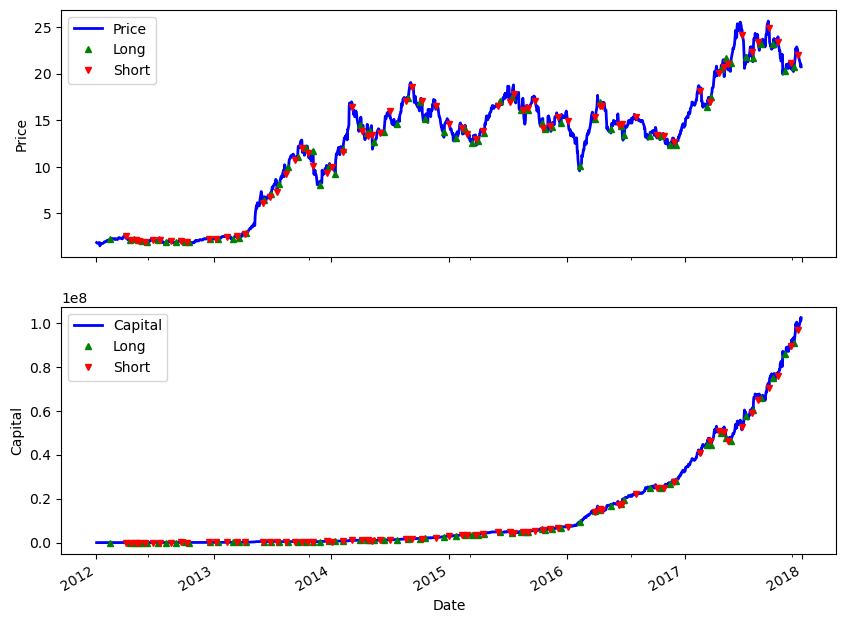

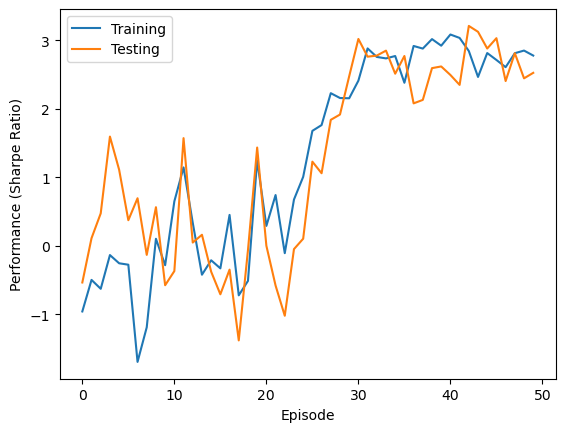

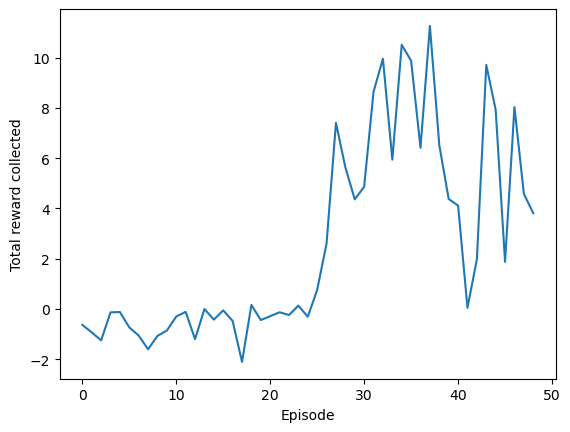

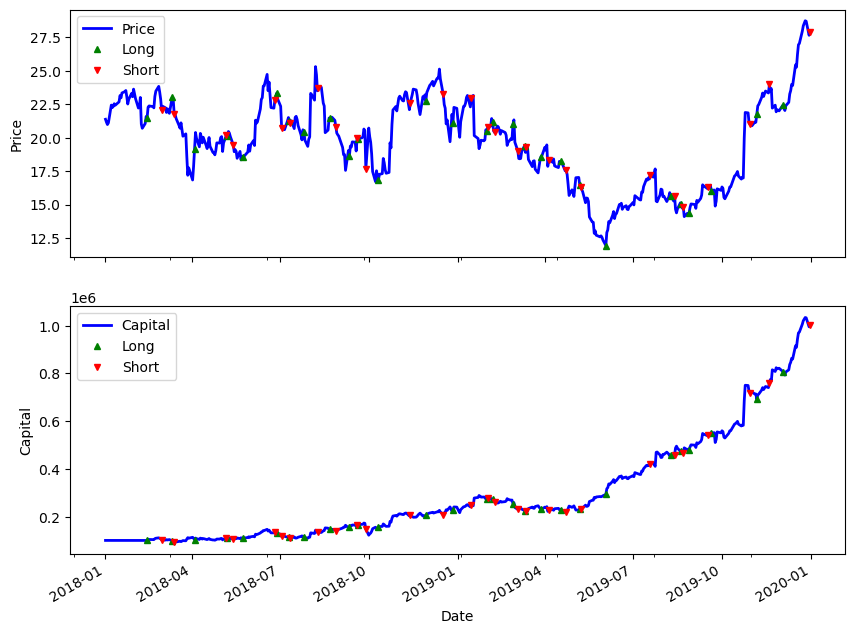

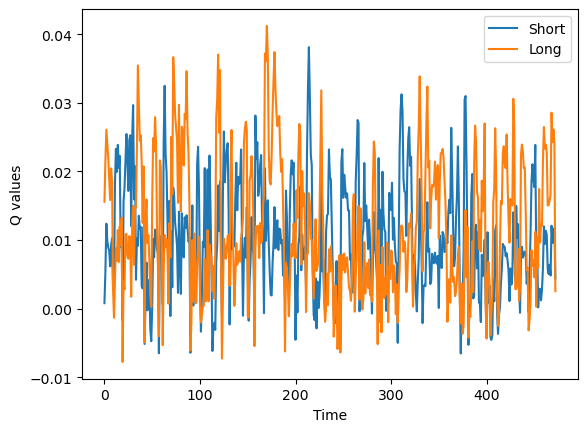

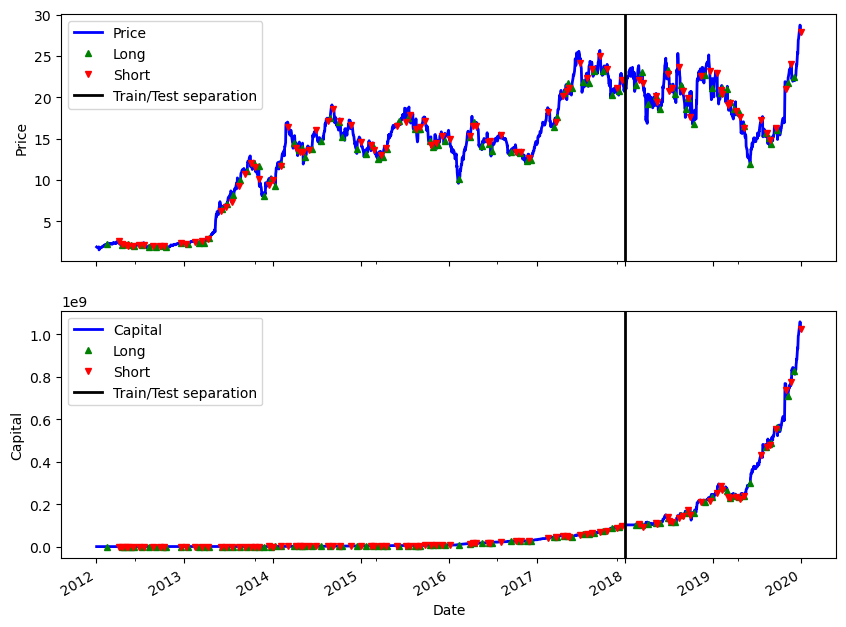

In [4]:

simulator.simulateNewStrategy(strategy,
                              stock,
                              startingDate=startingDate,
                              endingDate=endingDate,
                              splitingDate=splitingDate,
                              rendering=True,
                              saveStrategy=False,
                              data_dir=DATA_PATH,
                              money=money,
                              observationSpace=observationSpace,
                              actionSpace=actionSpace,
                              stateLength=stateLength,
                              bounds=bounds,
                              step=step,
                              numberOfEpisodes=numberOfEpisodes,
                              transactionCosts=transactionCosts,
                              features=features)


# Experiment Results

| Performance Indicator           | Training    | Testing   | B&H      | S&H      | TF      | MR      | TDQN    |
|----------------------------------|-------------|-----------|----------|----------|---------|---------|---------|
| Profit & Loss (P&L)              | 102198433   | 902061    | 29847    | -29847   | 73301   | 8600    | 98      |
| Annualized Return                | 43.07%      | 89.15%    | 24.11%   | -7.38%   | 100.00% | 19.02%  | 12.80%  |
| Annualized Volatility            | 45.42%      | 50.91%    | 53.14%   | 46.11%   | 52.70%  | 58.05%  | 52.09%  |
| Sharpe Ratio                     | 2.776       | 2.524     | 0.508    | -0.154   | 0.987   | 0.358   | 0.261   |
| Sortino Ratio                    | 4.648       | 3.691     | 0.741    | -0.205   | 1.229   | 0.539   | 0.359   |
| Maximum Drawdown                 | 12.99%      | 23.91%    | 52.83%   | 54.09%   | 79.91%  | 65.31%  | 58.95%  |
| Maximum Drawdown Duration        | 32 days     | 33 days   | 205 days | 144 days | 229 days| 159 days| 331 days|
| Profitability                    | 70.83%      | 60.71%    | 100.00%  | 0.00%    | 34.38%  | 67.65%  | 38.18%  |
| Ratio Average Profit/Loss        | 5.007       | 4.106     | ∞        | 0.00     | 0.534   | 0.496   | 1.621   |


# Comparing and Contrasting Guided vs Benchmark

| Performance Indicator           | Training (Guided) | Testing (Guided) | Training (Benchmark) | Testing (Benchmark) |
|----------------------------------|-------------------|------------------|----------------------|---------------------|
| Profit & Loss (P&L)              | 102198433         | 902061           | 11686926             | -9801               |
| Annualized Return                | 43.07%            | 89.15%           | 36.25%               | 8.03%               |
| Annualized Volatility            | 45.42%            | 50.91%           | 45.32%               | 51.64%              |
| Sharpe Ratio                     | 2.776             | 2.524            | 1.983                | 0.162               |
| Sortino Ratio                    | 4.648             | 3.691            | 3.196                | 0.204               |
| Maximum Drawdown                 | 12.99%            | 23.91%           | 15.31%               | 60.36%              |
| Maximum Drawdown Duration        | 32 days           | 33 days          | 47 days              | 95 days             |
| Profitability                    | 70.83%            | 60.71%           | 54.82%               | 46.38%              |
| Ratio Average Profit/Loss        | 5.007             | 4.106            | 3.082                | 1.112               |


| Performance Indicator           | Testing (Guided) | Testing (Benchmark) | Guided Improvement   |
|----------------------------------|------------------|---------------------|---------|
| Profit & Loss (P&L)              | 902061           | -9801               | 911862  |
| Annualized Return                | 89.15%           | 8.03%               | 81.12%  |
| Annualized Volatility            | 50.91%           | 51.64%              | -0.73%  |
| Sharpe Ratio                     | 2.524            | 0.162               | 2.362   |
| Sortino Ratio                    | 3.691            | 0.204               | 3.487   |
| Maximum Drawdown                 | 23.91%           | 60.36%              | -36.45% |
| Maximum Drawdown Duration        | 33 days          | 95 days             | -62 days|
| Profitability                    | 60.71%           | 46.38%              | 14.33%  |
| Ratio Average Profit/Loss        | 4.106            | 1.112               | 2.994   |
